# Classifying Iris Species

- In this lab, we are Classifying the new Iris Species by building the KNN model. We are building the model using previously idetified species data from measurements of sepal and petal.
- We have already classified this data using different model like Random Forest,Regression.
- This time we are learning the KNN model on this simple dataset.Please note the real data cannot simple like this. In that we need to inspect the data. to see if the information might not be contained in the data or having unexpected measurements.
- I am learning this model from Introduction to Machine Learning with Python book.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print(iris_dataset['DESCR'][:50])

.. _iris_dataset:

Iris plants dataset
-----------


In [5]:
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


In [6]:
print("Target names:{}".format(iris_dataset['target_names']))

Target names:['setosa' 'versicolor' 'virginica']


In [7]:
print("feature_names:{}".format(iris_dataset['feature_names']))

feature_names:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [9]:
print("Shape of data:{}".format(iris_dataset['data'].shape))

Shape of data:(150, 4)


In [10]:
print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))

First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [11]:
print("Target:/n{}".format(iris_dataset['target']))

Target:/n[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state =0)

In [14]:
print("Shape of X_train:{}".format(X_train.shape))

Shape of X_train:(112, 4)


In [15]:
print("Shape of y_train:{}".format(y_train.shape))

Shape of y_train:(112,)


In [16]:
# Create the dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names.
iris_df = pd.DataFrame(X_train,columns = iris_dataset.feature_names)
print(iris_df.head())
print(iris_df.shape)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.9               3.0                4.2               1.5
1                5.8               2.6                4.0               1.2
2                6.8               3.0                5.5               2.1
3                4.7               3.2                1.3               0.2
4                6.9               3.1                5.1               2.3
(112, 4)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115D7520>,
      dtype=object)

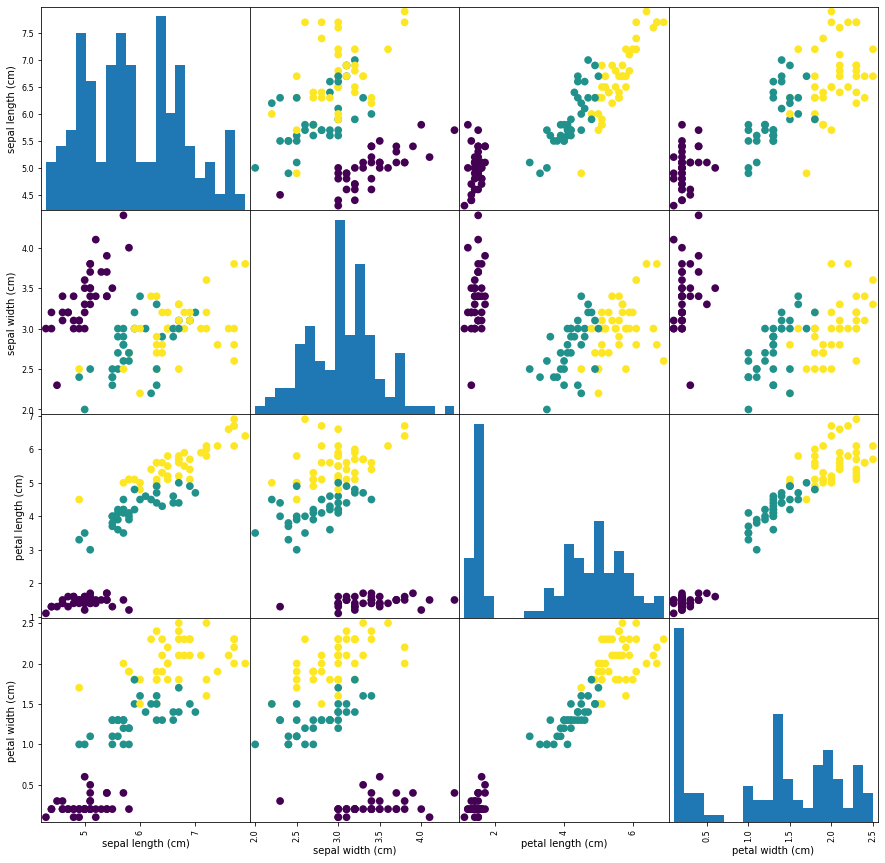

In [17]:
#create a scatter matrix from dataframe, color by y_train.
pd.plotting.scatter_matrix(iris_df, c= y_train, figsize=(15,15), marker ='o',hist_kwds={'bins':20}, s=60,alpha = 8)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Predictions :

In [19]:
# predict the output using new data.
X_new = np.array([[5,2.9,1,0.2]])
print("X_new.shape:{}".format(X_new.shape))

X_new.shape:(1, 4)


In [20]:
prediction = knn.predict(X_new)
print("prediction:{}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

prediction:[0]
Predicted target name: ['setosa']



### Evaluating the Model:

the pediction which we made earlier, to check it is correct or not. we are making the prediction for each iris in test data
and compare it against its label i.e. known species and also compute the accuracy.

In [21]:
y_pred = knn.predict(X_test)
print("test set predictions:\n {}".format(y_pred))

test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [22]:
print("test set score: {:.2f}".format(np.mean(y_pred==y_test)))

test set score: 0.97


In [23]:
# we can use the knn score method  also.
print("test knn score: {:.2f}".format(knn.score(X_test,y_test)))

test knn score: 0.97


### Conclusion:

The test accuracy of this model is about 0.97, which means we made the correct prediction for 97% of the iris in the test set.
According to this we can make the assuption for new data our model to be correct 97%.